In [252]:
import chatminer.visualizations as vis
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [253]:
from chatminer.chatparsers import WhatsAppParser

parser = WhatsAppParser("grp.txt")
parser.parse_file()
df = parser.parsed_messages.get_df()

13.06.2023 00:20:13 INFO     
            Depending on the platform, the message format in chat logs might not be
            standardized accross devices/versions/localization and might change over
            time. Please report issues including your message format via GitHub.
            
13.06.2023 00:20:13 INFO     Initialized parser.
13.06.2023 00:20:13 INFO     Starting reading raw messages...


13.06.2023 00:20:13 INFO     Inferred date format: [day/month/year]
13.06.2023 00:20:13 INFO     Finished reading 24065 raw messages.
13.06.2023 00:20:13 INFO     Starting parsing raw messages...
100%|██████████| 24065/24065 [00:05<00:00, 4091.41it/s]
13.06.2023 00:20:19 INFO     Finished parsing raw messages.


In [254]:
# now check which author sent the most messages
df['author'].value_counts()

Shaheer Spb                   4263
Umer FaST                     3792
Abdullah FAST                 2626
Saad FAST                     1888
~Naveed                       1485
                              ... 
‪+92 310 4792928‬                1
‪+92 300 6573755‬                1
Muhammad Hassan Fast Nuces       1
~ Sheheryar                      1
‪+92 300 4049999‬                1
Name: author, Length: 74, dtype: int64

In [255]:
#change the timestamp to different columns of year, month, day, hour, minute, second
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

df.head()

,timestamp,author,message,weekday,hour,words,letters,year,month,day
0,2023-06-12 21:05:59,Shaheer Spb,Jtni Khuzaima ne krdi thi iska ye email likhna...,Monday,21,11,55,2023,6,12
1,2023-06-12 21:05:28,Abdullah FAST,Group mn add krdo yr isse @923144210921 misses...,Monday,21,18,93,2023,6,12
2,2023-06-12 20:54:03,Aiman FAST,image omitted,Monday,20,2,13,2023,6,12
3,2023-06-12 20:54:02,Aiman FAST,image omitted,Monday,20,2,13,2023,6,12
4,2023-06-12 18:10:57,Shaheer Spb,Teri soch itni choti kyu hai? Group me ni leta...,Monday,18,21,110,2023,6,12


In [260]:
# omit author "~Naveed"
df = df[df.author != "~Naveed"]

# now Chose only top 15 authors
df1 = df['author'].value_counts().head(10).index
df1

Index(['Shaheer Spb', 'Umer FaST', 'Abdullah FAST', 'Saad FAST',
       'Fatima Fast Bsds', 'Shahzeb Fast', 'Haroon FAST', 'Hasan FaST',
       'Mansoor FAST', 'Anas FAST'],
      dtype='object')

In [267]:
# now plot #plot the number of messages sent by each author in the chat
# X axis is the author(Name) and Y axis is the number of messages sent
# plt.figure(figsize=(15, 8))
# plt.title("Number of messages sent by each author")
# plt.ylabel("Number of messages sent")
# plt.xlabel("Author")
# plt.xticks(rotation=90)
# plt.bar(df1, df['author'].value_counts().head(10))
# plt.show()

# now do the same thing but with plotly
fig = px.bar(df, x=df1, y=df['author'].value_counts().head(10), title="Number of messages sent by each author")
# change the colors of the bars and the background and the text and annotations
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5, opacity=0.6) # change the color of the bars and the background
fig.update_layout(title_text='Number of messages sent by each author', xaxis_title="Author", yaxis_title="Number of messages sent") # change the title of the graph and the x and y axis
fig.update_layout(plot_bgcolor='rgb(255,255,255)') # change the background color
# show the bar on the side of the bar which shows the number of messages sent
#fig.update_layout(annotations=[dict(text="Number of messages sent", x=0.5, y=-0.15, showarrow=False, font_size=20, font_family="Arial", font_color="black")])


fig.show()

In [263]:
#only visualize the top 20 authors


#plot the number of messages sent by each author in the chat
# X axis is the author(Name) and Y axis is the number of messages sent
fig = px.bar(df['author'].value_counts(), x=df['author'].value_counts().index, y=df['author'].value_counts().values, color=df['author'].value_counts().index, color_discrete_sequence=px.colors.qualitative.Pastel1)
# also annotate the number of messages sent by each author
#fig.update_layout(annotations=[dict(x=xi, y=yi, text=str(yi), xanchor='center', yanchor='bottom', showarrow=False) for xi, yi in zip(df['author'].value_counts().index, df['author'].value_counts().values)])
fig.show()

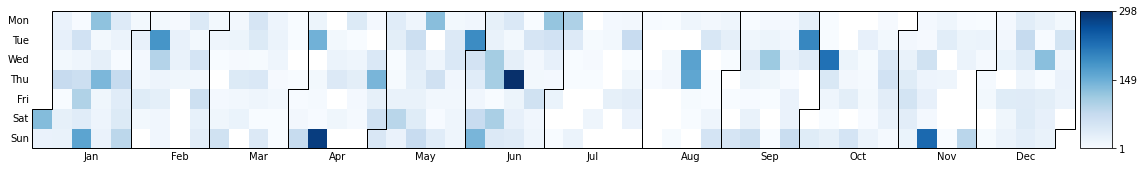

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
#ax[0] = vis.calendar_heatmap(df, year=2023, cmap='Oranges', ax=ax[0])
ax = vis.calendar_heatmap(df, year=2022, linewidth=0, monthly_border=True)



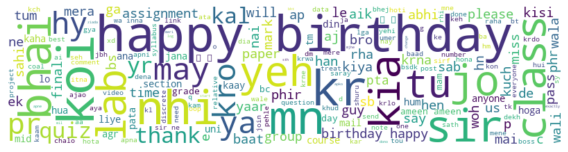

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
stopwords = ['message','deleted','h','ma','media','b','wo','ab','hai', 'acha', 'omitted','ka','se','ye','image','ur','toh','hain','yes','nahi','s','ok','ni','ko','kya','m','ha','hi','ki','to','mein','me','audio','u','haan','hoon','yar','the','thi','thi','tha']

kwargs={"background_color": "white", "width": 800, "height": 200, "max_words": 200}
ax = vis.wordcloud(df, ax=ax, stopwords=stopwords, **kwargs)